<a href="https://colab.research.google.com/github/Ankith-1501/PortofolioProjects/blob/main/Customer_Segmentation_Using_K_Means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Customer Segmentation Using K-Means Clustering**

To group customers into segments based on their purchasing behavior, demographics, or other factors, helping businesses understand their customer base and tailor marketing strategies accordingly.

In [8]:
from google.colab import files
uploaded = files.upload()

# Now, load the dataset
import pandas as pd
import io
import seaborn as sns
import matplotlib.pyplot as plt


# Replace 'Mall_Customers.csv' with the uploaded file's name
data = pd.read_csv('Mall_Customers.csv')

Saving Mall_Customers.csv to Mall_Customers.csv


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [10]:
# Display the first few rows of the dataset
print(data.head())

# Check for missing values
print('Check Missing Values')
print(data.isnull().sum())

# Basic statistics for numerical columns
print('Statistics')
print(data.describe())

   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
Check Missing Values
CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64
Statistics
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000  

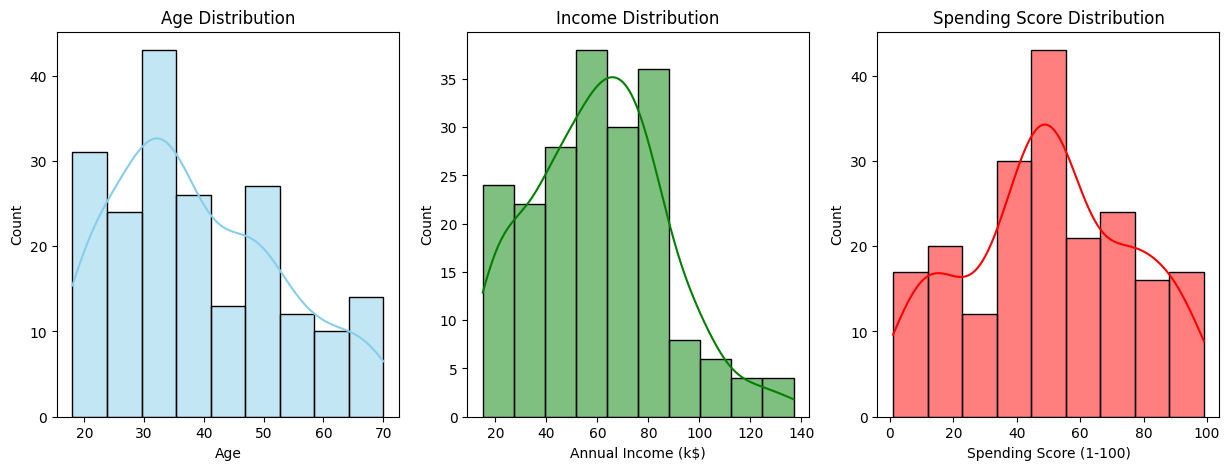

<ipython-input-13-dd581da8384c>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Genre', data=data, palette='coolwarm')


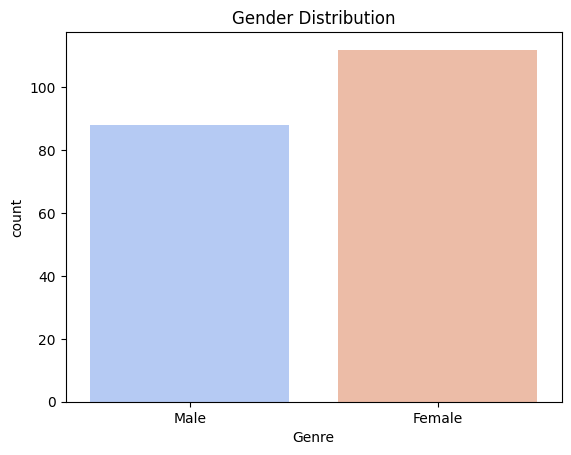

In [13]:
# Plot the distribution of Age, Annual Income, and Spending Score
plt.figure(figsize=(15,5))

plt.subplot(1, 3, 1)
sns.histplot(data['Age'], kde=True, color='skyblue')
plt.title('Age Distribution')

plt.subplot(1, 3, 2)
sns.histplot(data['Annual Income (k$)'], kde=True, color='green')
plt.title('Income Distribution')

plt.subplot(1, 3, 3)
sns.histplot(data['Spending Score (1-100)'], kde=True, color='red')
plt.title('Spending Score Distribution')

plt.show()

# Plot gender distribution
sns.countplot(x='Genre', data=data, palette='coolwarm')
plt.title('Gender Distribution')
plt.show()


In [14]:
from sklearn.preprocessing import StandardScaler

# Select numerical columns
X = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


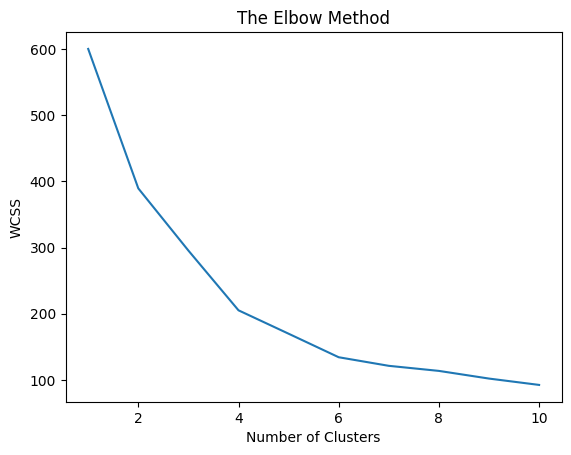

In [15]:
from sklearn.cluster import KMeans
import numpy as np

# Elbow Method to find the optimal K
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plotting the results
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')  # Within-cluster sum of squares
plt.show()


In [19]:
# Applying KMeans to the dataset
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

# Adding cluster labels to the original data
data['Cluster'] = y_kmeans

# Display the first few rows with the cluster labels
print(data.head())


   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   Cluster  
0        2  
1        2  
2        3  
3        2  
4        2  


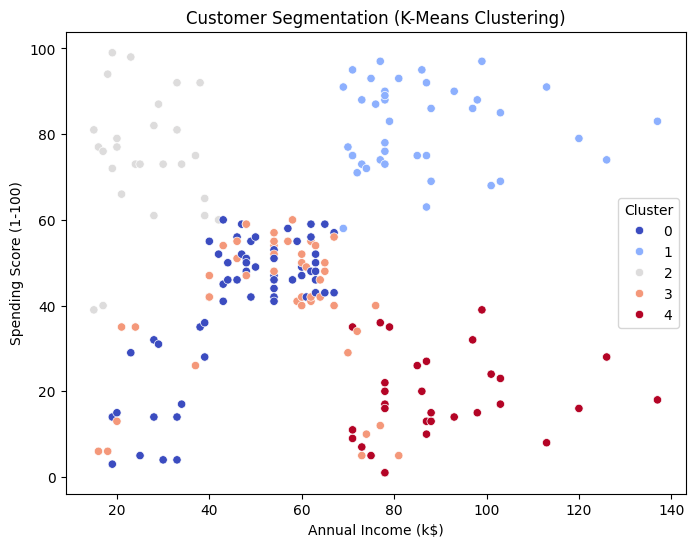

In [20]:
# 2D Plot: Visualizing the clusters
plt.figure(figsize=(8,6))
sns.scatterplot(x=data['Annual Income (k$)'], y=data['Spending Score (1-100)'], hue=data['Cluster'], palette='coolwarm')
plt.title('Customer Segmentation (K-Means Clustering)')
plt.show()
